In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
import tqdm
import random

In [2]:
from common import get_data, get_freq_data, signal_cyclic_shift, get_ref_time, generate_multi_signal

In [3]:
X_origin, y_origin = get_data()

mean_argmin =  int(np.argmin(X_origin, axis=1).mean())

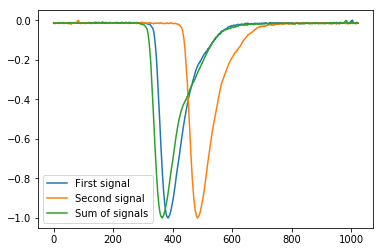

{'first_impulse': array([-0.01354333, -0.01473039, -0.01377714, ..., -0.01389105,
        -0.01414286, -0.01317762]),
 'second_impulse': array([-0.01485476, -0.01391111, -0.01484227, ..., -0.01382362,
        -0.01542346, -0.0139736 ]),
 'ref_time': 184,
 'multi_impulse': array([-0.0151329 , -0.01627748, -0.01536758, ..., -0.0152542 ,
        -0.01576888, -0.01467731])}

In [4]:
generate_multi_signal(X_origin, y_origin, 100, 0.1, to_plot=True)

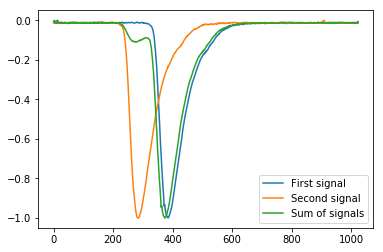

{'first_impulse': array([-0.00385869, -0.00193571, -0.00189114, ..., -0.00970404,
        -0.00953212, -0.00585171]),
 'second_impulse': array([-0.01307765, -0.01143508, -0.01310912, ..., -0.01200778,
        -0.01312171, -0.01201407]),
 'ref_time': 150,
 'multi_impulse': array([-0.00487562, -0.00305768, -0.0030129 , ..., -0.01058608,
        -0.01041503, -0.00657936])}

In [5]:
generate_multi_signal(X_origin, y_origin, -100, 0.1, to_plot=True)

In [11]:
from sklearn.utils import shuffle

def prepare_data(X_origin, y_origin, tau_range, alpha_range, data_size=1000, to_print=False):    
    X = []
    y = []
    alpha_values = []
    tau_values = []
    for i in range(data_size):
        alpha = random.choice(alpha_range)
        tau = random.choice(tau_range)
        signal = generate_multi_signal(X_origin, y_origin, tau, alpha)
        
        
        X.append(signal['multi_impulse'])
        y.append(signal['multi_ref_time']) 
        
        alpha_values.append(alpha)
        tau_values.append(tau)
   
    X = np.array(X)
    y = np.array(y)
    
    if to_print:
        print("X shape:", X.shape)
        print("y shape:", y.shape)
    
    X, y = shuffle(X, y)

#     plt.scatter(alpha_values, tau_values)
#     plt.show()
    
    return X, y

In [7]:
# alpha_range = np.array([np.around(10**i, decimals=4) for i in np.arange(0, 3.1, 0.01)])

# alpha_range = [10]
# tau_range = [0]
alpha_range = np.array([np.around(10**i, decimals=4) for i in np.arange(-3, 3.1, 0.1)])
tau_range = np.arange(-100, 101, 1)

(array([6., 7., 5., 6., 6., 6., 7., 6., 6., 6.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <a list of 10 Patch objects>)

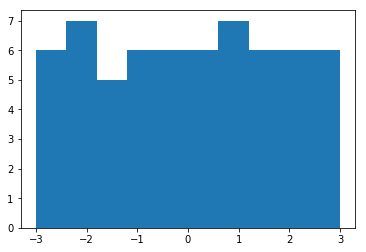

In [8]:
plt.hist(np.log10(alpha_range))

In [9]:
X, y = prepare_data(X_origin, y_origin, tau_range, alpha_range, data_size=5000, to_print=True) 

X shape: (5000, 1024)
y shape: (5000,)


In [10]:
# X = get_freq_data(X, freq=15)

In [ ]:
X.shape

In [14]:
from sklearn.preprocessing import normalize

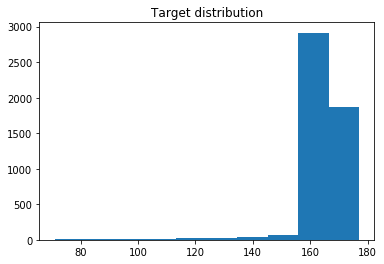

In [15]:
plt.title("Target distribution")
plt.hist(y)
plt.show()

Ref time: 91


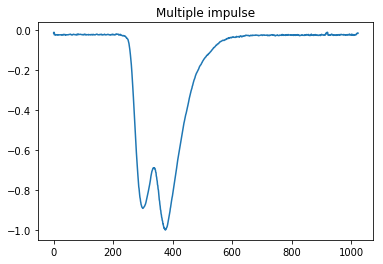

In [16]:
idxs = []
for i in range(len(y)):
    if y[i] < 100:
        idxs.append(i)
        
i = 3
plt.title("Multiple impulse")
plt.plot(X[idxs[i]])
print("Ref time:", y[idxs[i]])

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import PassiveAggressiveRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

In [18]:
def print_scores():
    for model in models.values():    
        model_name = type(model).__name__
        print("Regressor:", model_name)
    #         stregr = StackingRegressor(regressors=models, meta_regressor=model)
        scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
        scores = cross_validate(model, X, y, scoring=scoring, cv=5)

        r2_score_mean = scores['test_r2'].mean()
        r2_score_std = scores['test_r2'].std()
        mse_score_mean = -scores['test_neg_mean_squared_error'].mean()
        mse_score_std = scores['test_neg_mean_squared_error'].std()
        mae_score_mean = -scores['test_neg_mean_absolute_error'].mean()
        mae_score_std = scores['test_neg_mean_absolute_error'].std()
        rmse_score_mean = np.sqrt(-scores['test_neg_mean_squared_error']).mean()
        rmse_score_std = np.sqrt(-scores['test_neg_mean_squared_error']).std()

        cur_scores = [(r2_score_mean, r2_score_std), (mse_score_mean, mse_score_std),\
                          (mae_score_mean, mae_score_std), (rmse_score_mean, rmse_score_std)]
    #         print('!!!!!!!!')
    #         print("TEST")
    #         print(models_scores[type(models[0]).__name__]['r2'])
    #         print('!!!!!!!!')
        print("95% confidence interval:")
        for i, metric in enumerate(['r2', 'mse', 'mae', 'rmse'], 0):
    #         models_scores[model_name][metric].append(cur_scores[i])
            print(metric, "score: %0.5f (+/- %0.5f)" % (cur_scores[i][0], 2*cur_scores[i][1]))
        print('----------------------------------')
    print('____________________________________________________________')
    print()

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
def get_models():
    huber_reg = HuberRegressor(epsilon= 1.242, alpha= 0.01)
    ridge_reg = linear_model.Ridge(solver='lsqr', max_iter=4000, alpha=  0.513)
    lasso_reg = linear_model.Lasso(max_iter=4400, alpha= 0.00849, normalize=False)
    dt_reg = tree.DecisionTreeRegressor(min_samples_split=9, min_samples_leaf=9, min_weight_fraction_leaf=0.018, 
                                                                                                 max_features='auto')

    pa_reg = PassiveAggressiveRegressor(C=0.44, max_iter=2800, tol=2.4e-5)
    xgb_reg = xgb.XGBRegressor(objective="reg:linear", alpha= 0.01, booster='gbtree', eta= 0.323, gamma=0.189, 
                               reg_lambda=0.48, max_depth=6, verbosity=0)
    return {'huber': huber_reg, 'ridge': ridge_reg, 'lasso': lasso_reg, 'dt': dt_reg, 'pa':pa_reg, 'xgb': xgb_reg}

In [21]:
models = get_models()

In [22]:
print_scores()

Regressor: HuberRegressor
95% confidence interval:
r2 score: -0.07823 (+/- 0.21634)
mse score: 95.53282 (+/- 37.06038)
mae score: 3.85717 (+/- 0.36107)
rmse score: 9.72748 (+/- 1.90679)
----------------------------------
Regressor: Ridge
95% confidence interval:
r2 score: 0.32431 (+/- 0.15983)
mse score: 59.30969 (+/- 17.93810)
mae score: 3.82336 (+/- 0.27180)
rmse score: 7.67939 (+/- 1.16047)
----------------------------------
Regressor: Lasso
95% confidence interval:
r2 score: 0.32274 (+/- 0.15387)
mse score: 59.53484 (+/- 18.87021)
mae score: 3.79071 (+/- 0.25915)
rmse score: 7.69213 (+/- 1.20992)
----------------------------------
Regressor: DecisionTreeRegressor
95% confidence interval:
r2 score: 0.32791 (+/- 0.18615)
mse score: 59.08739 (+/- 20.89009)
mae score: 3.23919 (+/- 0.19984)
rmse score: 7.65704 (+/- 1.35227)
----------------------------------
Regressor: PassiveAggressiveRegressor
95% confidence interval:
r2 score: -0.44551 (+/- 2.07706)
mse score: 142.67020 (+/- 255.0467

### Stacking

In [23]:
from mlxtend.regressor import StackingRegressor


In [24]:
for model_name, model in models.items():
    models = get_models()
    del models['pa'] ### Delete passive agressive regressor, which performs poorly
    
    print("Metaregressor:", type(model).__name__)

    stregr = StackingRegressor(regressors=list(models.values()), meta_regressor=model)
    scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
    scores = cross_validate(stregr, X, y, scoring=scoring, cv=5)

    r2_score_mean = scores['test_r2'].mean()
    r2_score_std = scores['test_r2'].std()
    mse_score_mean = -scores['test_neg_mean_squared_error'].mean()
    mse_score_std = scores['test_neg_mean_squared_error'].std()
    mae_score_mean = -scores['test_neg_mean_absolute_error'].mean()
    mae_score_std = scores['test_neg_mean_absolute_error'].std()
    rmse_score_mean = np.sqrt(-scores['test_neg_mean_squared_error']).mean()
    rmse_score_std = np.sqrt(-scores['test_neg_mean_squared_error']).std()

    cur_scores = [(r2_score_mean, r2_score_std), (mse_score_mean, mse_score_std),\
                      (mae_score_mean, mae_score_std), (rmse_score_mean, rmse_score_std)]
    #         print('!!!!!!!!')
    #         print("TEST")
    #         print(models_scores[type(models[0]).__name__]['r2'])
    #         print('!!!!!!!!')
    print("95% confidence interval:")
    for i, metric in enumerate(['r2', 'mse', 'mae', 'rmse'], 0):
    #         models_scores[model_name][metric].append(cur_scores[i])
        print(metric, "score: %0.5f (+/- %0.5f)" % (cur_scores[i][0], 2*cur_scores[i][1]))
    print('--------------------------------------------------------')

Metaregressor: HuberRegressor


KeyboardInterrupt: 

### Let's plot regression scores for different frequency, tau and alpha values

In [25]:
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [26]:
alpha_values = np.array([np.around(10**i, decimals=4) for i in np.arange(-3, 3.1, 0.1)])
tau_values = range(-100, 110, 5)
freq_values = [1, 25, 50, 75, 100, 125, 150]
TIME_SCALE_COEF = 0.2
# alpha_values = np.around(np.arange(0, 100, 2), decimals=2)

In [27]:
def calculate_scores(X_origin, y_orign, alpha_values, tau_values, data_size=100, freq=1):
#     NORM_COEF = 50
    scores_dict = {}
    
    
    X, y = prepare_data(X_origin, y_origin, tau_values, alpha_values, to_print=False, data_size=int(len(X_origin)/4))
#     model = StackingRegressor(regressors=list(models.values()), meta_regressor=models['huber'])
    model = get_models()['xgb']
    X_freq = get_freq_data(X, freq=freq)
    model.fit(X_freq, y)

    for tau in tqdm.tqdm(tau_values):
        scores_dict[tau] = dict(zip(alpha_values, np.zeros(len(alpha_values))))
        for alpha in alpha_values:
            X_cur, y_cur = prepare_data(X_origin, y_origin, [tau], [alpha], data_size=data_size)
            X_cur = get_freq_data(X_cur, freq=freq)
            y_pred = model.predict(X_cur)

            scores_dict[tau][alpha] = np.log10(sqrt(mean_squared_error(y_pred, y_cur))) #* TIME_SCALE_COEF

    return scores_dict

In [29]:
import pickle

def save_obj(obj, name ):
    with open('./data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('./data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [32]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

VMIN = -0.5
VMAX = 2
STEP = 0.25
ORIGIN_FREQ = 5000

def plot_color_map(scores_dict, alpha_values, tau_values, alpha_freq=10, tau_freq=4, freq=1):
    _, _, z = dict_to_arrays(scores_dict)
    z = np.array(z)
    Z = z.reshape((len(tau_values), len(alpha_values)))

    plt.figure(figsize=(5, 5))
    ax = plt.gca()

    plt.title("log10(RMSE), frequency = " + str(int(ORIGIN_FREQ/freq)) + ' [MHz]') 
    plt.xlabel("Two signals ratio", fontsize=12)
    plt.ylabel("Delta t [ns]", fontsize=12)
    plt.xticks([alpha_freq*i for i in range(len(alpha_values[::alpha_freq]))], alpha_values[::alpha_freq])
    plt.yticks([tau_freq*i for i in range(len(tau_values[::tau_freq]))], [TIME_SCALE_COEF*el for el in tau_values[::tau_freq]])

#     im = ax.imshow(Z, interpolation='bilinear', cmap='spring', aspect='auto', vmin=VMIN, vmax=VMAX)
    im = ax.imshow(Z, interpolation='bilinear', cmap='spring', aspect='auto')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.5)

    cbar = plt.colorbar(im, cax=cax)
#     cbar.set_ticks(np.arange(VMIN, VMAX, STEP))
#     cbar.set_ticklabels(np.arange(VMIN, VMAX, STEP))
    plt.show()


100%|██████████| 42/42 [09:16<00:00, 13.25s/it]


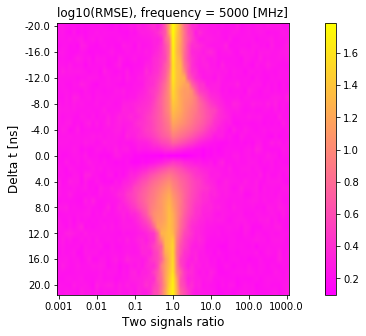


100%|██████████| 42/42 [08:11<00:00, 11.70s/it]


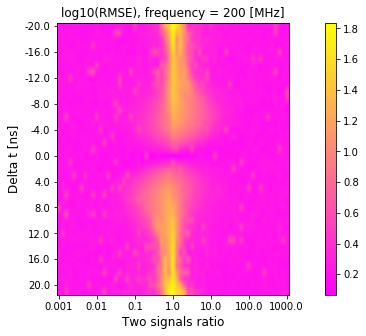


100%|██████████| 42/42 [07:03<00:00, 10.09s/it]


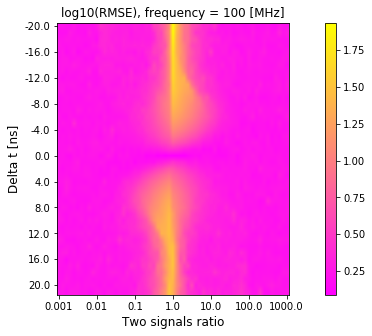


100%|██████████| 42/42 [07:06<00:00, 10.15s/it]


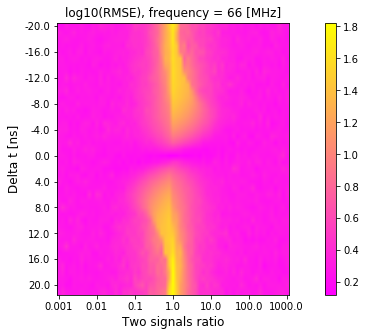


100%|██████████| 42/42 [07:03<00:00, 10.08s/it]


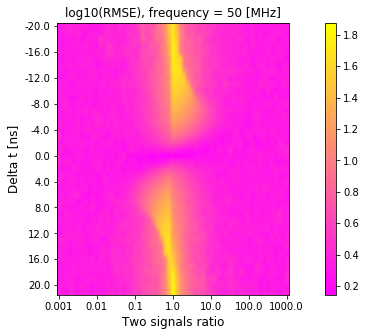


100%|██████████| 42/42 [07:03<00:00, 10.08s/it]


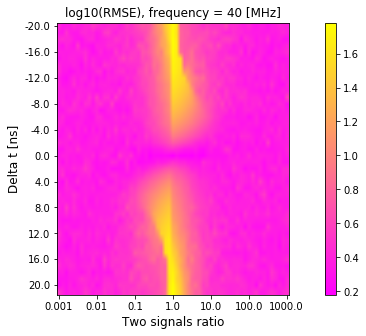


100%|██████████| 42/42 [07:06<00:00, 10.16s/it]


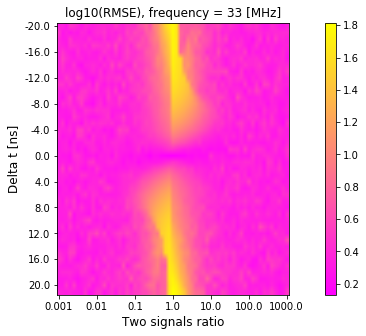

In [33]:
for freq in freq_values:
    X_origin, y_origin = get_data()
    scores_dict = calculate_scores(X_origin, y_origin, alpha_values, tau_values, data_size=500, freq=freq)
    plot_color_map(scores_dict, alpha_values, tau_values, freq=freq)
    save_obj(scores_dict, 'scores_ref_time_freq=' + str(freq))
#     plot_score_3d(scores_dict)